In [2]:
import csv
import pandas as pd

Read files

In [4]:
adm_file = '../data/ADMISSIONS.csv'
adm_df = pd.read_csv(adm_file)
adm_df.head(5)

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,NaN,NaN,INTERIOR MYOCARDIAL INFARCTION,0,1
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1


In [5]:
notes_file = '../data/NOTEEVENTS.csv'
notes_df = pd.read_csv(notes_file)
notes_df.head(5)

/var/folders/8j/rqc64sds4s79pkd4p8lbk96m0000gn/T/ipykernel_71691/1152086429.py:2: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  notes_df = pd.read_csv(notes_file)


,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
0,174,22532,167853.0,2151-08-04,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2151-7-16**] Dischar...
1,175,13702,107527.0,2118-06-14,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-6-2**] Discharg...
2,176,13702,167118.0,2119-05-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2119-5-4**] D...
3,177,13702,196489.0,2124-08-18,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2124-7-21**] ...
4,178,26880,135453.0,2162-03-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2162-3-3**] D...


In [ ]:
chunks = [notes_df[i:i + 10000] for i in range(0, notes_df.shape[0], 10000)]

# Save each chunk as a separate CSV file
for i, chunk in enumerate(chunks):
    chunk.to_csv(f'../data/chunk_{i}.csv', index=False)

In [6]:
grouped_df = adm_df.groupby('SUBJECT_ID').size().reset_index(name='row_count')
readmit_df = grouped_df[grouped_df['row_count'] > 1]
print(readmit_df)

       SUBJECT_ID  row_count
13             17          2
17             21          2
19             23          2
29             34          2
31             36          3
...           ...        ...
46470       99822          3
46488       99883          2
46491       99897          2
46498       99923          2
46513       99982          3

[7537 rows x 2 columns]


In [9]:
filtered_df = notes_df[notes_df['SUBJECT_ID'] == 36]
print(adm_df[adm_df['SUBJECT_ID'] == 36])

    ROW_ID  SUBJECT_ID  HADM_ID            ADMITTIME            DISCHTIME  \
15      36          36   182104  2131-04-30 07:15:00  2131-05-08 14:00:00   
16      37          36   122659  2131-05-12 19:49:00  2131-05-25 13:30:00   
17      38          36   165660  2134-05-10 11:30:00  2134-05-20 13:16:00   

   DEATHTIME ADMISSION_TYPE         ADMISSION_LOCATION  \
15       NaN      EMERGENCY  CLINIC REFERRAL/PREMATURE   
16       NaN      EMERGENCY       EMERGENCY ROOM ADMIT   
17       NaN       ELECTIVE  PHYS REFERRAL/NORMAL DELI   

          DISCHARGE_LOCATION INSURANCE LANGUAGE       RELIGION MARITAL_STATUS  \
15          HOME HEALTH CARE  Medicare     ENGL  NOT SPECIFIED        MARRIED   
16  REHAB/DISTINCT PART HOSP  Medicare     ENGL  NOT SPECIFIED        MARRIED   
17   LONG TERM CARE HOSPITAL  Medicare     ENGL  NOT SPECIFIED        MARRIED   

   ETHNICITY            EDREGTIME            EDOUTTIME  \
15     WHITE                  NaN                  NaN   
16     WHITE  213

In [10]:
print(filtered_df)

          ROW_ID  SUBJECT_ID   HADM_ID   CHARTDATE            CHARTTIME  \
6655        7412          36  182104.0  2131-05-08                  NaN   
6656        7413          36  122659.0  2131-05-25                  NaN   
6657        7414          36  165660.0  2134-05-20                  NaN   
68074      67800          36  165660.0  2134-05-12                  NaN   
68075      67801          36  122659.0  2131-05-19                  NaN   
...          ...         ...       ...         ...                  ...   
1300325  1260955          36  122659.0  2131-05-21  2131-05-21 21:53:00   
1300326  1260956          36  122659.0  2131-05-22  2131-05-22 04:12:00   
1300553  1260957          36  122659.0  2131-05-22  2131-05-22 06:29:00   
1300919  1260927          36  182104.0  2131-05-05  2131-05-05 04:39:00   
1300920  1260928          36  182104.0  2131-05-05  2131-05-05 06:20:00   

                   STORETIME           CATEGORY DESCRIPTION     CGID  ISERROR  \
6655              

In [11]:
adm_df['ADMITTIME'] = pd.to_datetime(adm_df['ADMITTIME'])
adm_df['DISCHTIME'] = pd.to_datetime(adm_df['DISCHTIME'])
adm_df['DEATHTIME'] = pd.to_datetime(adm_df['DEATHTIME'])

In [12]:
adm_df.sort_values(by=['SUBJECT_ID', 'ADMITTIME'], inplace=True)
adm_df['time_diff'] = adm_df.groupby('SUBJECT_ID')['ADMITTIME'].diff()
result_df = adm_df[(adm_df['time_diff'] < pd.Timedelta(days=30)) & (adm_df['time_diff'] >= pd.Timedelta(days=0))]
selected_subjects = result_df['SUBJECT_ID'].unique()


In [13]:
result_df.head(10)

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,time_diff
16,37,36,122659,2131-05-12 19:49:00,2131-05-25 13:30:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Medicare,ENGL,NOT SPECIFIED,MARRIED,WHITE,2131-05-12 17:26:00,2131-05-12 22:17:00,CHEST PAIN/SHORTNESS OF BREATH,0,1,12 days 12:34:00
72,70,68,108329,2174-01-04 22:21:00,2174-01-19 11:30:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,NaN,PROTESTANT QUAKER,SINGLE,BLACK/AFRICAN AMERICAN,2174-01-04 17:40:00,2174-01-05 03:00:00,WEAKNESS,0,1,20 days 06:05:00
109,107,103,133550,2144-08-30 23:09:00,2144-09-01 14:28:00,2144-09-01 14:28:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Private,NaN,CATHOLIC,MARRIED,UNKNOWN/NOT SPECIFIED,2144-08-30 17:12:00,2144-08-31 00:39:00,SUBARACHNOID HEMORRHAGE,1,1,18 days 05:32:00
112,110,105,128744,2189-02-21 01:45:00,2189-02-25 10:05:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicare,NaN,PROTESTANT QUAKER,SINGLE,BLACK/AFRICAN AMERICAN,2189-02-20 21:09:00,2189-02-21 03:10:00,FEVER,0,1,23 days 08:48:00
121,119,109,108375,2140-02-02 02:13:00,2140-02-02 16:25:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Medicaid,ENGL,NOT SPECIFIED,SINGLE,BLACK/AFRICAN AMERICAN,2140-02-01 22:03:00,2140-02-02 03:00:00,HYPERTENSIVE URGENCY,0,1,13 days 12:48:00
127,125,109,147469,2141-06-11 10:17:00,2141-06-17 16:29:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicaid,ENGL,NOT SPECIFIED,SINGLE,BLACK/AFRICAN AMERICAN,2141-06-11 07:02:00,2141-06-11 11:50:00,HYPERTENSIVE EMERGENCY,0,1,17 days 19:30:00
171,127,109,139061,2141-09-11 10:12:00,2141-09-14 20:00:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicaid,ENGL,NOT SPECIFIED,SINGLE,BLACK/AFRICAN AMERICAN,2141-09-11 06:47:00,2141-09-11 10:59:00,HYPERTENSION,0,1,5 days 14:08:00
172,128,109,172335,2141-09-18 10:32:00,2141-09-24 13:53:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicaid,ENGL,NOT SPECIFIED,SINGLE,BLACK/AFRICAN AMERICAN,2141-09-18 07:06:00,2141-09-18 11:25:00,LEG PAIN,0,1,7 days 00:20:00
173,129,109,126055,2141-10-13 23:10:00,2141-11-03 18:45:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Medicaid,ENGL,NOT SPECIFIED,SINGLE,BLACK/AFRICAN AMERICAN,2141-10-13 18:14:00,2141-10-14 00:16:00,ABDOMINAL PAIN,0,1,25 days 12:38:00
175,131,109,161950,2141-11-24 16:11:00,2141-12-01 19:00:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Medicaid,ENGL,NOT SPECIFIED,SINGLE,BLACK/AFRICAN AMERICAN,2141-11-24 09:59:00,2141-11-24 17:38:00,ABDOMINAL PAIN,0,1,6 days 02:11:00


In [14]:

result_df
#selected_subjects

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,time_diff
16,37,36,122659,2131-05-12 19:49:00,2131-05-25 13:30:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Medicare,ENGL,NOT SPECIFIED,MARRIED,WHITE,2131-05-12 17:26:00,2131-05-12 22:17:00,CHEST PAIN/SHORTNESS OF BREATH,0,1,12 days 12:34:00
72,70,68,108329,2174-01-04 22:21:00,2174-01-19 11:30:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,NaN,PROTESTANT QUAKER,SINGLE,BLACK/AFRICAN AMERICAN,2174-01-04 17:40:00,2174-01-05 03:00:00,WEAKNESS,0,1,20 days 06:05:00
109,107,103,133550,2144-08-30 23:09:00,2144-09-01 14:28:00,2144-09-01 14:28:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Private,NaN,CATHOLIC,MARRIED,UNKNOWN/NOT SPECIFIED,2144-08-30 17:12:00,2144-08-31 00:39:00,SUBARACHNOID HEMORRHAGE,1,1,18 days 05:32:00
112,110,105,128744,2189-02-21 01:45:00,2189-02-25 10:05:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicare,NaN,PROTESTANT QUAKER,SINGLE,BLACK/AFRICAN AMERICAN,2189-02-20 21:09:00,2189-02-21 03:10:00,FEVER,0,1,23 days 08:48:00
121,119,109,108375,2140-02-02 02:13:00,2140-02-02 16:25:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Medicaid,ENGL,NOT SPECIFIED,SINGLE,BLACK/AFRICAN AMERICAN,2140-02-01 22:03:00,2140-02-02 03:00:00,HYPERTENSIVE URGENCY,0,1,13 days 12:48:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58278,58839,99538,128902,2180-03-12 16:01:00,2180-03-16 14:23:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,ENGL,NOT SPECIFIED,UNKNOWN (DEFAULT),WHITE,2180-03-12 10:13:00,2180-03-12 16:44:00,DYSPNEA,0,1,27 days 22:15:00
58437,58870,99647,109725,2147-12-16 17:22:00,2147-12-28 14:30:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,LONG TERM CARE HOSPITAL,Private,ENGL,CATHOLIC,MARRIED,HISPANIC/LATINO - MEXICAN,2147-12-16 15:19:00,2147-12-16 18:37:00,DYSPNEA,0,1,22 days 03:05:00
58763,58905,99781,147562,2133-08-01 19:20:00,2133-08-06 16:27:00,NaT,EMERGENCY,CLINIC REFERRAL/PREMATURE,REHAB/DISTINCT PART HOSP,Medicare,ENGL,NOT SPECIFIED,SINGLE,WHITE,2133-08-01 15:55:00,2133-08-01 20:38:00,PNEUMONIA,0,1,9 days 02:09:00
58779,58921,99822,163117,2197-06-16 03:01:00,2197-06-25 17:00:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,ENGL,CATHOLIC,MARRIED,WHITE,2197-06-15 23:33:00,2197-06-16 05:14:00,HYPONATREMIA,0,1,16 days 14:40:00


In [15]:
notes_df[notes_df['SUBJECT_ID'] == 68]

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
10854,9138,68,170467.0,2174-01-03,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2173-12-15**] ...
10855,9139,68,108329.0,2174-01-18,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2174-1-4**] D...
55152,56004,68,108329.0,2174-01-19,NaN,NaN,Discharge summary,Addendum,NaN,NaN,"Name: [**Known lastname 5477**],[**Known firs..."
56394,56002,68,108329.0,2174-01-18,NaN,NaN,Discharge summary,Addendum,NaN,NaN,"Name: [**Known lastname 5477**],[**Known firs..."
67642,68074,68,170467.0,2173-12-17,NaN,NaN,Echo,Report,NaN,NaN,PATIENT/TEST INFORMATION:\nIndication: Dilated...
68147,68073,68,170467.0,2173-12-28,NaN,NaN,Echo,Report,NaN,NaN,PATIENT/TEST INFORMATION:\nIndication: Pericar...
137250,149865,68,108329.0,2174-01-07,NaN,NaN,ECG,Report,NaN,NaN,Sinus tachycardia. Left atrial abnormality. Lo...
137251,149866,68,108329.0,2174-01-06,NaN,NaN,ECG,Report,NaN,NaN,Sinus tachycardia\nRightward axis\nLow limb le...
137478,149867,68,170467.0,2174-01-04,NaN,NaN,ECG,Report,NaN,NaN,Sinus rhythm with baseline artifact. Low QRS v...
137479,149868,68,170467.0,2174-01-02,NaN,NaN,ECG,Report,NaN,NaN,Probable sinus tachycardia. Low voltage. Diffu...


In [16]:
adm_df.groupby(['ADMISSION_TYPE']).size()

ADMISSION_TYPE
ELECTIVE      7706
EMERGENCY    42071
NEWBORN       7863
URGENT        1336
dtype: int64

In [17]:
print(adm_df.ADMITTIME.dtypes)
print(adm_df.DISCHTIME.dtypes)
print(adm_df.DEATHTIME.dtypes)

datetime64[ns]
datetime64[ns]
datetime64[ns]


In [18]:
adm_df = adm_df.sort_values(['SUBJECT_ID','ADMITTIME'])
adm_df = adm_df.reset_index(drop = True)

In [19]:
adm_df.head(5)

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,time_diff
0,1,2,163353,2138-07-17 19:04:00,2138-07-21 15:48:00,NaT,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,NaN,NOT SPECIFIED,NaN,ASIAN,NaN,NaN,NEWBORN,0,1,NaT
1,2,3,145834,2101-10-20 19:08:00,2101-10-31 13:58:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,NaN,CATHOLIC,MARRIED,WHITE,2101-10-20 17:09:00,2101-10-20 19:24:00,HYPOTENSION,0,1,NaT
2,3,4,185777,2191-03-16 00:28:00,2191-03-23 18:41:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,HOME WITH HOME IV PROVIDR,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,2191-03-15 13:10:00,2191-03-16 01:10:00,"FEVER,DEHYDRATION,FAILURE TO THRIVE",0,1,NaT
3,4,5,178980,2103-02-02 04:31:00,2103-02-04 12:15:00,NaT,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,NaN,BUDDHIST,NaN,ASIAN,NaN,NaN,NEWBORN,0,1,NaT
4,5,6,107064,2175-05-30 07:15:00,2175-06-15 16:00:00,NaT,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,ENGL,NOT SPECIFIED,MARRIED,WHITE,NaN,NaN,CHRONIC RENAL FAILURE/SDA,0,1,NaT


In [20]:
adm_df['NEXT_ADMITTIME'] = adm_df.groupby('SUBJECT_ID').ADMITTIME.shift(-1)
adm_df['NEXT_ADMISSION_TYPE'] = adm_df.groupby('SUBJECT_ID').ADMISSION_TYPE.shift(-1)

In [21]:

import numpy as np
rows = adm_df.NEXT_ADMISSION_TYPE == 'ELECTIVE'
adm_df.loc[rows,'NEXT_ADMITTIME'] = pd.NaT
adm_df.loc[rows,'NEXT_ADMISSION_TYPE'] = np.NaN


adm_df = adm_df.sort_values(['SUBJECT_ID','ADMITTIME'])

adm_df[['NEXT_ADMITTIME','NEXT_ADMISSION_TYPE']] = adm_df.groupby(['SUBJECT_ID'])[['NEXT_ADMITTIME','NEXT_ADMISSION_TYPE']].fillna(method = 'bfill')

In [22]:
adm_df['DAYS_TIL_NEXT_ADMIT'] = (adm_df.NEXT_ADMITTIME - adm_df.DISCHTIME).dt.total_seconds()/(24*60*60)

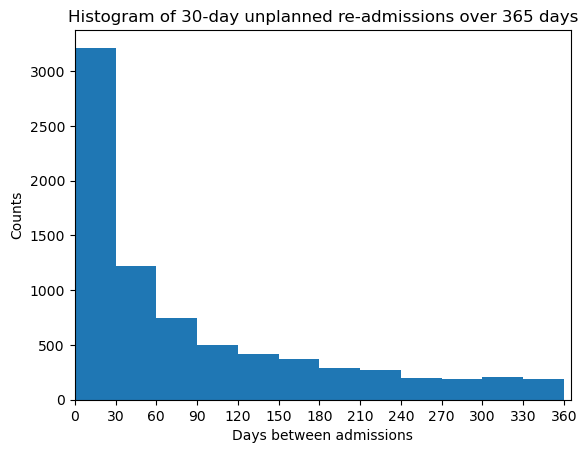

In [23]:
import matplotlib.pyplot as plt
plt.hist(adm_df.loc[~adm_df.DAYS_TIL_NEXT_ADMIT.isnull(),'DAYS_TIL_NEXT_ADMIT'], bins =range(0,365,30))
plt.xlim([0,365])
plt.xlabel('Days between admissions')
plt.ylabel('Counts')
plt.xticks(np.arange(0, 365, 30))
plt.title('Histogram of 30-day unplanned re-admissions over 365 days')
plt.show()

In [24]:
notes_df['CATEGORY'].value_counts()

Nursing/other        822497
Radiology            522279
Nursing              223556
ECG                  209051
Physician            141624
Discharge summary     59652
Echo                  45794
Respiratory           31739
Nutrition              9418
General                8301
Rehab Services         5431
Social Work            2670
Case Management         967
Pharmacy                103
Consult                  98
Name: CATEGORY, dtype: int64

In [25]:
notes_df.CHARTDATE = pd.to_datetime(notes_df.CHARTDATE, format = '%Y-%m-%d', errors = 'coerce')
notes_df.CHARTTIME = pd.to_datetime(notes_df.CHARTTIME, format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')

In [26]:
notes_df = notes_df.sort_values(['SUBJECT_ID','CHARTDATE', 'CHARTTIME'])
notes_df = notes_df.reset_index(drop = True)

In [33]:
filtered_df['ADMITTIME'] = pd.to_datetime(adm_df['ADMITTIME'])

In [34]:
distinct_years = pd.to_datetime(adm_df['ADMITTIME']).dt.year.unique()
distinct_years  

array([2138, 2101, 2191, 2103, 2175, 2121, 2117, 2149, 2178, 2104, 2167,
       2134, 2135, 2108, 2183, 2196, 2153, 2157, 2139, 2160, 2126, 2177,
       2172, 2170, 2116, 2186, 2122, 2131, 2166, 2114, 2132, 2192, 2129,
       2133, 2112, 2128, 2136, 2141, 2184, 2197, 2146, 2118, 2119, 2113,
       2169, 2143, 2188, 2155, 2173, 2174, 2185, 2164, 2163, 2180, 2147,
       2148, 2150, 2142, 2162, 2111, 2176, 2156, 2105, 2137, 2144, 2189,
       2115, 2109, 2140, 2110, 2194, 2159, 2154, 2161, 2165, 2179, 2127,
       2145, 2158, 2107, 2125, 2120, 2106, 2152, 2168, 2124, 2193, 2182,
       2181, 2151, 2198, 2130, 2187, 2102, 2199, 2190, 2195, 2171, 2123,
       2201, 2100, 2200, 2202, 2203, 2204, 2209, 2205, 2206, 2207, 2208,
       2210])

In [41]:
filtered_df_year = adm_df[adm_df['ADMITTIME'].dt.year == 2132]
# yearly_counts = adm_df.groupby(adm_df['ADMITTIME'].dt.year)['SUBJECT_ID'].count()
# 
# # Print or use the yearly_counts Series
# print(yearly_counts.sort_values())

In [42]:
filtered_df_year

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,...,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,time_diff,NEXT_ADMITTIME,NEXT_ADMISSION_TYPE,DAYS_TIL_NEXT_ADMIT
41,42,41,101757,2132-12-31 10:30:00,2133-01-27 15:45:00,NaT,ELECTIVE,PHYS REFERRAL/NORMAL DELI,DISC-TRAN TO FEDERAL HC,Private,...,WHITE,NaN,NaN,RIGHT BRAIN STEM LESION/SDA,0,1,NaT,NaT,NaN,NaN
64,65,65,143430,2132-08-10 07:13:00,2132-08-20 15:47:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Private,...,WHITE,2132-08-10 06:01:00,2132-08-10 08:23:00,S/P STRUCK BY CAR,0,1,NaT,NaT,NaN,NaN
202,203,153,191611,2132-09-13 03:34:00,2132-09-15 12:25:00,NaT,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,...,WHITE,NaN,NaN,NEWBORN,0,1,NaT,NaT,NaN,NaN
251,252,189,119333,2132-09-08 07:15:00,2132-09-12 12:35:00,NaT,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Private,...,WHITE,NaN,NaN,AORTIC STENOSIS\AORTIC VALVE REPLACEMENT; RESE...,0,1,NaT,NaT,NaN,NaN
296,297,228,167764,2132-10-30 02:16:00,2132-11-10 17:30:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Medicare,...,WHITE,2132-10-30 00:13:00,2132-10-30 05:40:00,LT FEMUR FRACTURE,0,1,NaT,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58592,58593,98797,105447,2132-12-24 20:06:00,2132-12-25 12:00:00,2132-12-25 12:00:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Medicare,...,WHITE,2132-12-24 18:53:00,2132-12-24 21:41:00,ALTERED MENTAL STATUS,1,1,NaT,NaT,NaN,NaN
58722,58723,99213,149621,2132-08-09 15:00:00,2132-09-25 11:23:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Private,...,OTHER,2132-08-09 13:09:00,2132-08-09 15:54:00,S/P MCC,0,1,NaT,NaT,NaN,NaN
58782,58783,99383,121180,2132-12-27 21:03:00,2133-01-15 14:38:00,NaT,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicaid,...,ASIAN - ASIAN INDIAN,NaN,NaN,PANCREATITIS,0,1,497 days 23:05:00,NaT,NaN,NaN
58884,58885,99707,132573,2132-02-10 22:13:00,2132-02-22 17:40:00,NaT,EMERGENCY,CLINIC REFERRAL/PREMATURE,SNF,Medicare,...,WHITE,2132-02-10 18:22:00,2132-02-11 00:07:00,SUBDURAL HEMATOMA,0,1,NaT,NaT,NaN,NaN


In [ ]:
df_subj_concat_notes = notes_df[['SUBJECT_ID', 'TEXT']].copy()
df_subj_concat_notes = df_subj_concat_notes.groupby('SUBJECT_ID')['TEXT'].agg(' '.join).reset_index()
df_subj_concat_notes.rename(columns={"TEXT":"TEXT_CONCAT"}, inplace=True)

In [ ]:
df_subj_concat_notes

In [ ]:
assert df_subj_concat_notes.duplicated(['SUBJECT_ID']).sum() == 0, 'Dulpicate SUBJECT_IDs exist'

In [ ]:
df_adm_notes = pd.merge(adm_df[['SUBJECT_ID','HADM_ID','ADMITTIME','DISCHTIME','DAYS_TIL_NEXT_ADMIT','NEXT_ADMITTIME','ADMISSION_TYPE','DEATHTIME']],
                        df_subj_concat_notes, 
                        on = ['SUBJECT_ID'],
                        how = 'left')
assert len(adm_df) == len(df_adm_notes), 'Number of rows increased'

In [ ]:
df_adm_notes['OUTPUT_LABEL'] = (df_adm_notes.DAYS_TIL_NEXT_ADMIT < 30).astype('int')

In [ ]:
print('Number of positive samples:', (df_adm_notes.OUTPUT_LABEL == 1).sum())
print('Number of negative samples:', (df_adm_notes.OUTPUT_LABEL == 0).sum())
print('Total samples:', len(df_adm_notes))

In [ ]:
df_adm_notes_squashed = df_adm_notes[['SUBJECT_ID', 'TEXT_CONCAT', 'OUTPUT_LABEL']]

In [ ]:
df_subj_labels_squashed = df_adm_notes_squashed.groupby('SUBJECT_ID')[['OUTPUT_LABEL']].sum().reset_index()

In [ ]:
df_subj_labels_squashed.rename(columns={"OUTPUT_LABEL":"OUTPUT_LABELS_SUMMED"}, inplace=True)

In [ ]:
df_subj_labels_squashed['OUTPUT_LABEL'] = (df_subj_labels_squashed['OUTPUT_LABELS_SUMMED'] >= 1).astype(int)

In [ ]:
df_subj_labels_squashed

In [ ]:
df_subj_labels_squashed.drop(columns=['OUTPUT_LABELS_SUMMED'], inplace=True)

In [ ]:
df_adm_notes_squashed.drop(columns=['OUTPUT_LABEL'], inplace=True)

In [ ]:
df_adm_notes_squashed.drop_duplicates(subset='SUBJECT_ID', keep='first', inplace=True)

In [ ]:
print('Length of df_adm_notes_squashed:', len(df_adm_notes_squashed))
print('Length of df_subj_labels_squashed:', len(df_subj_labels_squashed))

In [ ]:
df_adm_notes_merged = pd.merge(df_subj_labels_squashed[['SUBJECT_ID','OUTPUT_LABEL']],
                        df_adm_notes_squashed, 
                        on = ['SUBJECT_ID'],
                        how = 'left')
assert len(df_subj_labels_squashed) == len(df_adm_notes_merged), 'Number of rows increased'

In [ ]:
df_adm_notes_merged = df_adm_notes_merged.sample(n=len(df_adm_notes_merged), random_state=42)
df_adm_notes_merged = df_adm_notes_merged.reset_index(drop=True)


In [ ]:
df_adm_notes_merged

In [ ]:
df_valid_and_test = df_adm_notes_merged.sample(frac=0.20, random_state=42)
df_test = df_valid_and_test.sample(frac=0.5, random_state=42)
df_valid = df_valid_and_test.drop(df_test.index)
df_train = df_adm_notes_merged.drop(df_valid_and_test.index)
assert len(df_adm_notes_merged) == (len(df_test)+len(df_valid)+len(df_train)),"Split wasn't done mathematically correct."

In [ ]:
print("Training set prevalence (n = {:d}):".format(len(df_train)), "{:.2f}%".format((df_train.OUTPUT_LABEL.sum()/len(df_train))*100))
print("Validation set prevalence (n = {:d}):".format(len(df_valid)), "{:.2f}%".format((df_valid.OUTPUT_LABEL.sum()/len(df_valid))*100))
print("Test set prevalence (n = {:d}):".format(len(df_test)), "{:.2f}%".format((df_test.OUTPUT_LABEL.sum()/len(df_test))*100))
print("All samples (n = {:d})".format(len(df_adm_notes_merged)))

In [ ]:
# pos_rows = df_train.OUTPUT_LABEL == 1
# df_train_pos = df_train.loc[pos_rows]
# df_train_neg = df_train.loc[~pos_rows]
# # Merge the balanced data
# df_train = pd.concat([df_train_pos, df_train_neg.sample(n = len(df_train_pos), random_state=42)], axis = 0)
# # Shuffle the order of training samples
# df_train = df_train.sample(n = len(df_train), random_state = 42).reset_index(drop=True)
# print("Training set prevalence (n = {:d}):".format(len(df_train)), "{:.2f}%".format((df_train.OUTPUT_LABEL.sum()/len(df_train))*100))

## Should we Prevalence 

In [ ]:
# Clean 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import re
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer # lemmatizes word based on its parts of speech
print('Punctuation:', string.punctuation)
print('NLTK English Stop Words:', '\n', stopwords.words('english'))

In [ ]:
df = []